In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.style.use('ggplot')

In [4]:
dv = pd.read_csv('Base_datos_Reciclaje.csv')

dv.pop('Unnamed: 6')

dv.head()

,Fecha,Operador_logistíco,Sede,Nombre_Categoria,Nombre_Material,Cantidad_kg,YEAR,MONTH
0,2016-01-28,Recuperar,Medellín,Metales,Aluminio,24.0,2016,Ene
1,2016-01-28,Recuperar,Medellín,Metales,Chatarra,3230.0,2016,Ene
2,2016-01-28,Recuperar,Medellín,Otros,Palos de Escoba,0.0,2016,Ene
3,2016-01-28,Recuperar,Medellín,Papeles y Cartones,Archivo,2409.0,2016,Ene
4,2016-01-28,Recuperar,Medellín,Papeles y Cartones,Cartón,858.0,2016,Ene


In [6]:
dv.to_excel('Base_datos_Reciclaje.xlsx', sheet_name='Base Datos', index=False)

# Graficas

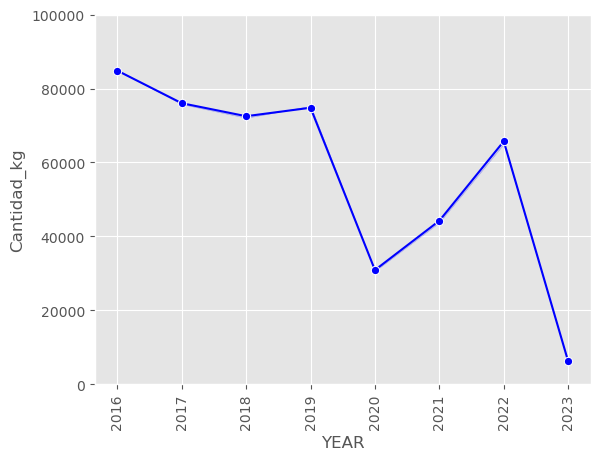

In [5]:
sns.lineplot(
    data=dv,
    x='YEAR',
    y='Cantidad_kg',
    errorbar=('ci', 0),
    estimator='sum',
    marker='o',
    color='blue'
)

plt.ylim(0, 100000)
plt.xticks(rotation='vertical')
plt.show()

/tmp/ipykernel_5867/2656469607.py:1: UserWarning: The palette list has more values (10) than needed (8), which may not be intended.
  sns.lineplot(


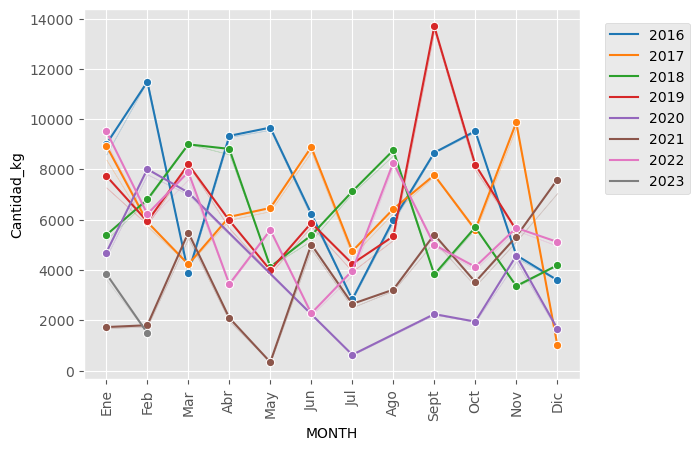

In [60]:
sns.lineplot(
    data=dv,
    x='MONTH',
    y='Cantidad_kg',
    errorbar=('ci', 0),
    estimator='sum',
    marker='o',
    hue='YEAR',
    palette=sns.color_palette("tab10")
)

#plt.ylim(0, 100000)
plt.legend(loc=(1.05, 0.5))
plt.xticks(rotation='vertical')
plt.show()

In [58]:
subset = {
    'DATE': list(),
    'OPERADOR': list(),
    'SEDE': list(),
    'CATEGORY': list(),
    'MATERIAL': list(),
    'CANT_kg': list(),
    'YEAR': list(),
    'MONTH': list()
}

for i in range(0, dv['Fecha'].count(), 1):
    if dv['Nombre_Material'][i] in ['Cartón', 'Plástico', 'Plega', 'Vidrio']:
        subset['DATE'].append(dv['Fecha'][i])
        subset['OPERADOR'].append(dv['Operador_logistíco'][i])
        subset['SEDE'].append(dv['Sede'][i])
        subset['CATEGORY'].append(dv['Nombre_Categoria'][i])
        subset['MATERIAL'].append(dv['Nombre_Material'][i])
        subset['CANT_kg'].append(dv['Cantidad_kg'][i])
        subset['YEAR'].append(dv['YEAR'][i])
        subset['MONTH'].append(dv['MONTH'][i])

subset = pd.DataFrame(subset)
subset.tail()

,DATE,OPERADOR,SEDE,CATEGORY,MATERIAL,CANT_kg,YEAR,MONTH
409,2023-01-28,Recimed,Volador,Otros,Cartón,382.0,2023,Ene
410,2023-02-28,Recimed,Volador,Otros,Cartón,232.1,2023,Feb
411,2023-02-28,Recimed,Volador,Papeles y Cartones,Plega,278.6,2023,Feb
412,2023-01-28,Recimed,Volador,Vidrio,Vidrio,151.0,2023,Ene
413,2023-02-28,Recimed,Volador,Vidrio,Vidrio,278.6,2023,Feb


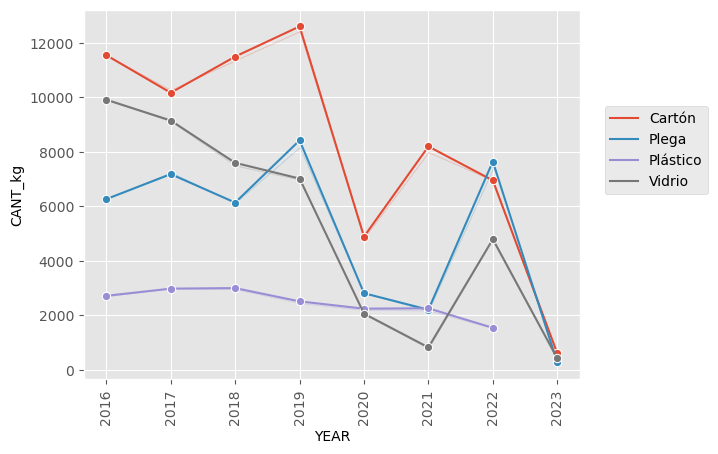

In [59]:
sns.lineplot(
    data=subset,
    x='YEAR',
    y='CANT_kg',
    errorbar=('ci', 0),
    estimator='sum',
    marker='o',
    hue='MATERIAL'
)

#plt.ylim(0, 100000)
plt.legend(loc=(1.05, 0.5))
plt.xticks(rotation='vertical')
plt.show()